# Challenge 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [24]:
df.value.quantile(0.025)
df.value.quantile(0.975)

177613.075

In [ ]:
df.value.plot()

## Clean Data

In [25]:
q_025 = df.value.quantile(0.025)
q_0975 = df.value.quantile(0.975)

def calc_tails(input):
        if (input > q_025) & (input < q_0975): 
            return 1
        else:
              return 0

df['test'] = df.apply(lambda x: calc_tails(x.value), axis=1)
df = (df.query('test in [1]')
   .loc[:,['value']]
)

## Line Plot

In [ ]:
def draw_line_plot(x):
    dates = pd.to_datetime(df.index)
    views = df.value

    fig, ax = plt.subplots(figsize=(14,6))
    ax.plot(dates, views, color='darkred')

    ax.set(xlabel='Date', ylabel='Page Views',
        title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    return fig

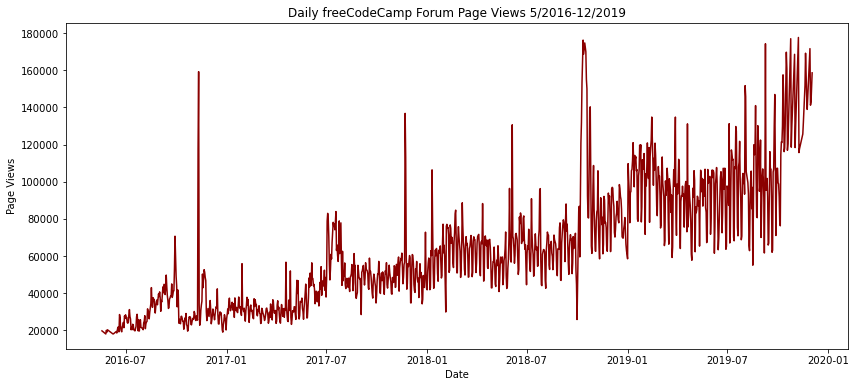

In [41]:
# Data for plotting
dates = pd.to_datetime(df.index)
views = df.value

fig, ax = plt.subplots(figsize=(14,6))
ax.plot(dates, views, color='darkred')

ax.set(xlabel='Date', ylabel='Page Views',
       title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

plt.show()

## Bar Plot

In [101]:
# Data for plotting
dates = pd.to_datetime(df.index)


df_avg = (df.assign(year = pd.to_datetime(df.index).year,
           month = pd.to_datetime(df.index).month)
   .groupby(["year", "month"])
   .mean()
)

# df_avg = df_avg.reset_index()

In [102]:
df_avg.head()

value
year month              
2016 5      19432.400000
     6      21875.105263
     7      24109.678571
     8      31049.193548
     9      41476.866667

In [95]:
df_pivot = pd.pivot_table(df_avg, values='value', index=['year'],
                       columns=['month'])

df_pivot = df_pivot.reset_index()

<AxesSubplot:xlabel='Years', ylabel=' Average Page Views'>

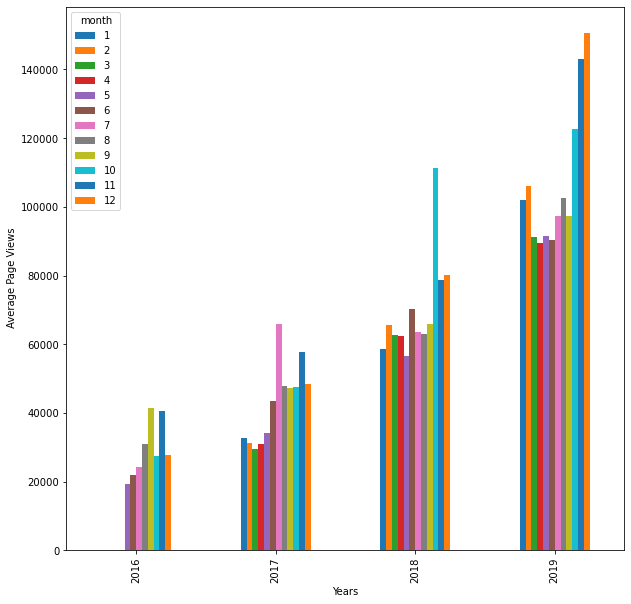

In [125]:
# plot grouped bar chart 
df_pivot.plot(x='year', 
        kind='bar', 
        stacked=False,
        figsize= (10,10),
        xlabel = 'Years',
        ylabel = ' Average Page Views') 


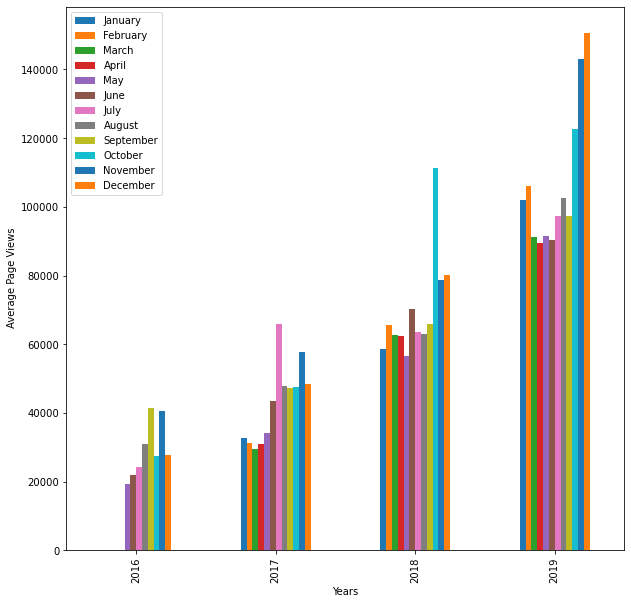

In [133]:
# fig, ax = plt.subplots()
figure = df_pivot.plot(x='year', 
        kind='bar', 
        stacked=False,
        figsize= (10,10),
        xlabel = 'Years',
        ylabel = ' Average Page Views') 

plt.legend([
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December"
])



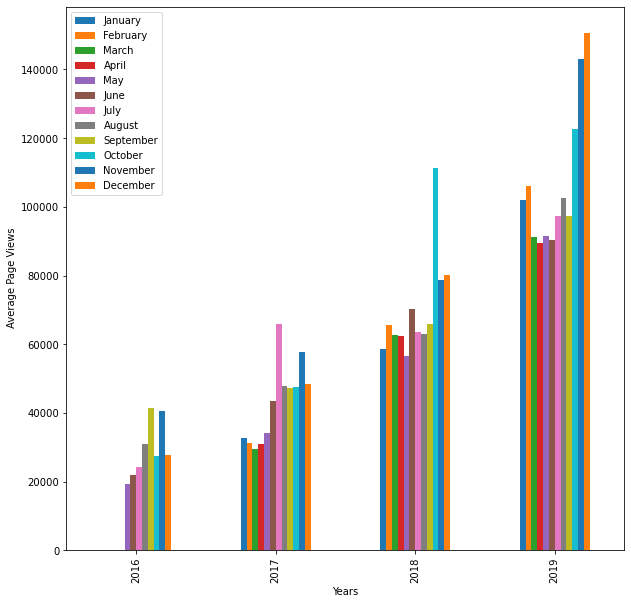

In [136]:
figure.figure

# Double Boxplot